# WT-1: Anime Recommendations with Simple Linear Regression


# Rahul Manjhi



.




# #1 Dataset Exploration:

## 1. Importing Libraries and Loading the Data


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Anime dataset and its first few rows.

In [15]:
url = 'anime.csv'
url2 = 'rating.csv'

anime_df = pd.read_csv(url)
rating_df = pd.read_csv(url2)

In [16]:
# Display the first few rows of each dataset
anime_data_head = anime_df.head()
rating_data_head = rating_df.head()

anime_data_head, rating_data_head

(   anime_id                              name  \
 0     32281                    Kimi no Na wa.   
 1      5114  Fullmetal Alchemist: Brotherhood   
 2     28977                          Gintama°   
 3      9253                       Steins;Gate   
 4      9969                     Gintama&#039;   
 
                                                genre   type episodes  rating  \
 0               Drama, Romance, School, Supernatural  Movie        1    9.37   
 1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
 2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
 3                                   Sci-Fi, Thriller     TV       24    9.17   
 4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   
 
    members  
 0   200630  
 1   793665  
 2   114262  
 3   673572  
 4   151266  ,
    user_id  anime_id  rating
 0        1        20      -1
 1        1        24      -1
 2        1        79      -1
 3   

## 2. Checking for Missing Values


In [19]:
# Check for missing values in each column
missing_values = anime_df.isnull().sum()
missing_values2 = rating_df.isnull().sum()

print("Missing values per column:\n", missing_values, missing_values2)


Missing values per column:
 anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64 user_id     0
anime_id    0
rating      0
dtype: int64


## 3. Dropping or Imputing Missing Values


In [20]:
# Drop rows where 'rating' is missing
anime_df = anime_df.dropna(subset=['rating'])

# Replace missing 'genre' values with 'Unknown'
anime_df['genre'] = anime_df['genre'].fillna('Unknown')


## 4. Visualizing the Distribution of rating and members


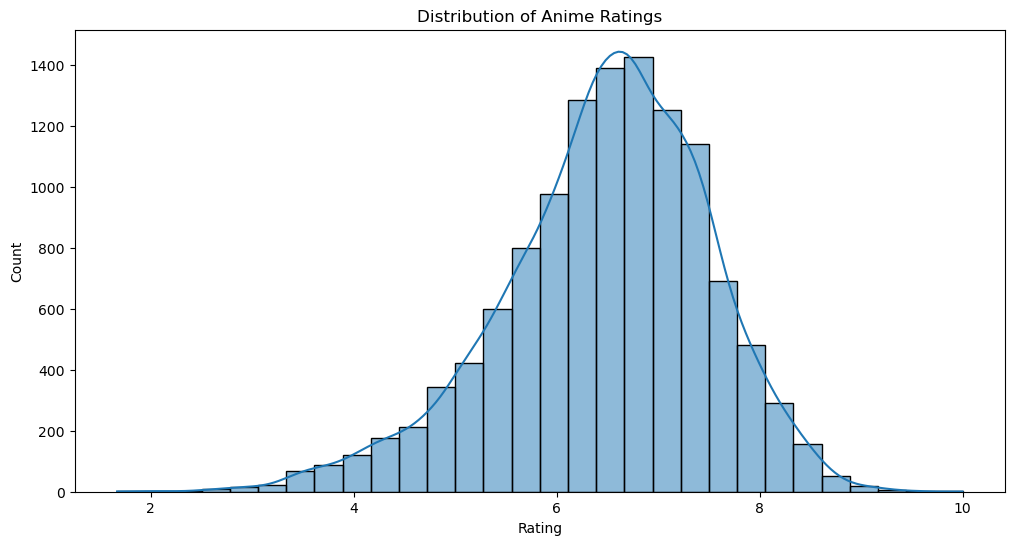

In [24]:
# Plot the distribution of 'rating'
plt.figure(figsize=(12, 6))
sns.histplot(anime_df['rating'], bins=30, kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.show()


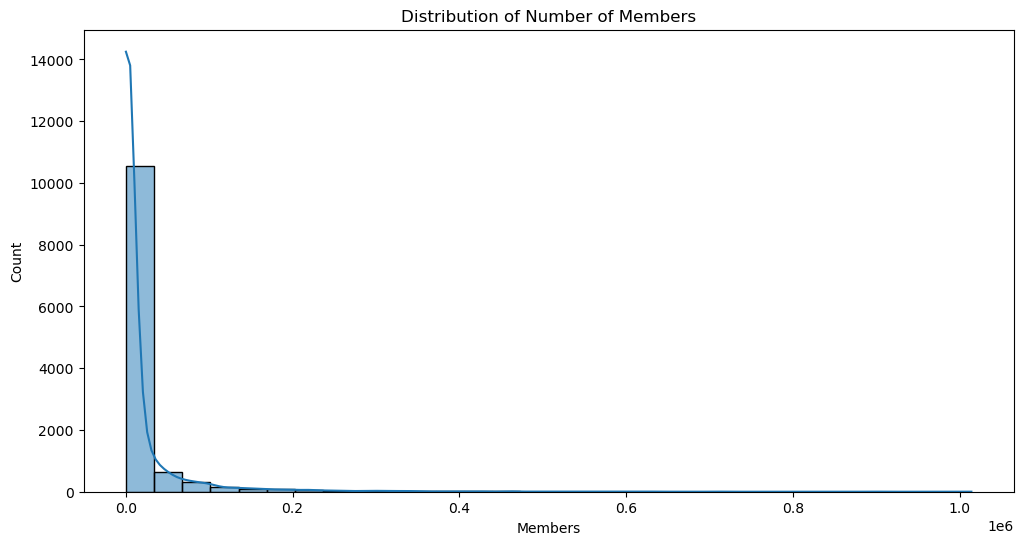

In [25]:
# Plot the distribution of 'members'
plt.figure(figsize=(12, 6))
sns.histplot(anime_df['members'], bins=30, kde=True)
plt.title('Distribution of Number of Members')
plt.xlabel('Members')
plt.show()


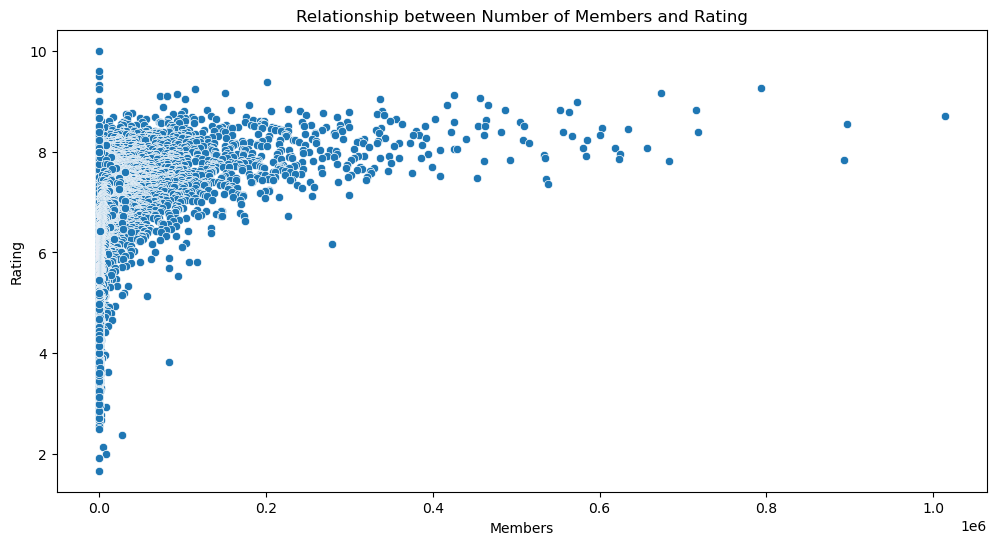

In [26]:
# Scatter plot to check relationship between 'rating' and 'members'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='members', y='rating', data=anime_df)
plt.title('Relationship between Number of Members and Rating')
plt.xlabel('Members')
plt.ylabel('Rating')
plt.show()


## 5. Handling Outliers


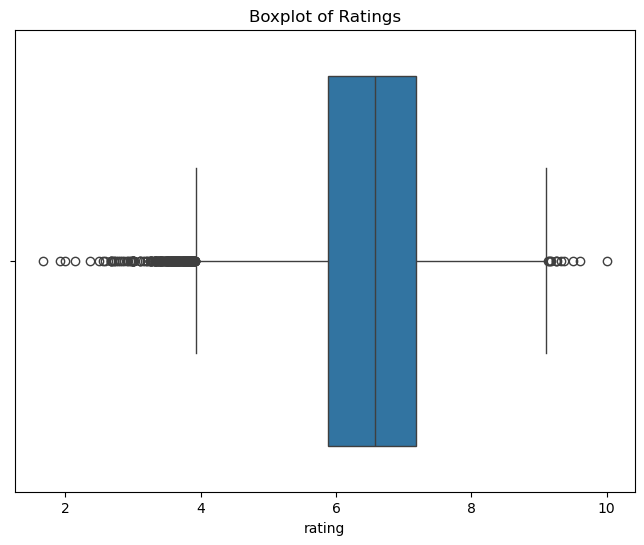

In [27]:
# Boxplot for 'rating'
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', data=anime_df)
plt.title('Boxplot of Ratings')
plt.show()


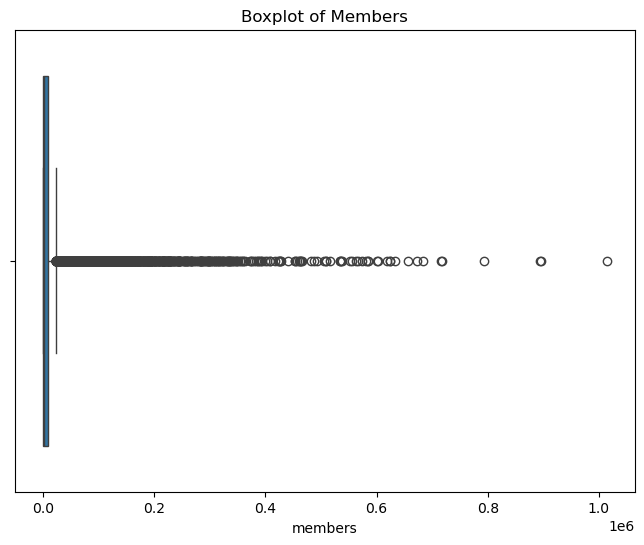

In [28]:
# Boxplot for 'members'
plt.figure(figsize=(8, 6))
sns.boxplot(x='members', data=anime_df)
plt.title('Boxplot of Members')
plt.show()

# Cap the 'members' column at the 95th percentile
cap_value = anime_df['members'].quantile(0.95)
anime_df['members'] = anime_df['members'].apply(lambda x: min(x, cap_value))

## 6. Encoding the genre Column and Creating New Features


In [29]:
# Create a new feature that counts the number of genres for each anime
anime_df['genre_count'] = anime_df['genre'].apply(lambda x: len(x.split(',')))

# One-hot encode the 'genre' column (optional)
anime_genres = anime_df['genre'].str.get_dummies(sep=',')
anime_df = pd.concat([anime_df, anime_genres], axis=1)

# Display the updated DataFrame
print(anime_df.head())


   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

    members  genre_count   Adventure   Cars  ...  Shounen  Slice of Life  \
0  94362.65            4           0      0  ...        0              0   
1  94362.65            7           1      0  ...        0              0

## 7. Final Check of the Cleaned Data


In [31]:
# Final check for missing values
print(anime_df.isnull().sum())

# Check the structure of the dataset
print(anime_df.info())


anime_id        0
name            0
genre           0
type            0
episodes        0
               ..
Supernatural    0
Thriller        0
Unknown         0
Vampire         0
Yaoi            0
Length: 91, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 12064 entries, 0 to 12293
Data columns (total 91 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        12064 non-null  int64  
 1   name            12064 non-null  object 
 2   genre           12064 non-null  object 
 3   type            12064 non-null  object 
 4   episodes        12064 non-null  object 
 5   rating          12064 non-null  float64
 6   members         12064 non-null  float64
 7   genre_count     12064 non-null  int64  
 8    Adventure      12064 non-null  int64  
 9    Cars           12064 non-null  int64  
 10   Comedy         12064 non-null  int64  
 11   Dementia       12064 non-null  int64  
 12   Demons         12064 non-null  int64 

# #2 Feature Engineering


## 1. Create a New Feature for Genre Count:


In [32]:
# Create a new feature that counts the number of genres for each anime
anime_df['genre_count'] = anime_df['genre'].apply(lambda x: len(x.split(',')))

# Display the updated DataFrame to verify
print(anime_df[['name', 'genre', 'genre_count']].head())


                               name  \
0                    Kimi no Na wa.   
1  Fullmetal Alchemist: Brotherhood   
2                          Gintama°   
3                       Steins;Gate   
4                     Gintama&#039;   

                                               genre  genre_count  
0               Drama, Romance, School, Supernatural            4  
1  Action, Adventure, Drama, Fantasy, Magic, Mili...            7  
2  Action, Comedy, Historical, Parody, Samurai, S...            7  
3                                   Sci-Fi, Thriller            2  
4  Action, Comedy, Historical, Parody, Samurai, S...            7  


## 2. Log Transformation of the members Column:


In [35]:
# Apply log transformation to the 'members' column to reduce skewness
anime_df['log_members'] = anime_df['members'].apply(lambda x: np.log1p(x)) 
# Display the updated DataFrame to verify
print(anime_df[['members', 'log_members']].head())

    members  log_members
0  94362.65    11.454911
1  94362.65    11.454911
2  94362.65    11.454911
3  94362.65    11.454911
4  94362.65    11.454911


## 3. One-Hot Encoding the genre Column:


In [36]:
# One-hot encode the 'genre' column by splitting on commas
anime_genres = anime_df['genre'].str.get_dummies(sep=',')

# Concatenate the one-hot encoded genres back to the original DataFrame
anime_df = pd.concat([anime_df, anime_genres], axis=1)

# Display the updated DataFrame to verify
print(anime_df.head())


   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

    members  genre_count   Adventure   Cars  ...  Shounen  Slice of Life  \
0  94362.65            4           0      0  ...        0              0   
1  94362.65            7           1      0  ...        0              0

## 4. Final DataFrame Check:


In [38]:
print(anime_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 12064 entries, 0 to 12293
Columns: 175 entries, anime_id to Yaoi
dtypes: float64(3), int64(168), object(4)
memory usage: 16.2+ MB
None


# #3 Simple Linear Regression


## 1. Regression Setup:


## 2. Train-Test Split:


## 3. Model Fitting:


## 4. Plotting the Regression Line:


After fitting the model, we'll visualize the relationship by plotting a regression line on top of a scatter plot.



In [46]:
# Set up the independent (X) and dependent (Y) variables
X = anime_df[['log_members']]
y = anime_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict the ratings on the test set
y_pred = regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get the regression coefficients (slope) and intercept
slope = regressor.coef_[0]
intercept = regressor.intercept_
print(f'Regression Slope: {slope}')
print(f'Regression Intercept: {intercept}')

Mean Squared Error: 0.6014308621145235
Regression Slope: 0.2910252005335904
Regression Intercept: 4.321222394157205


## 5. Plot the Regression Line on a Scatter Plot:


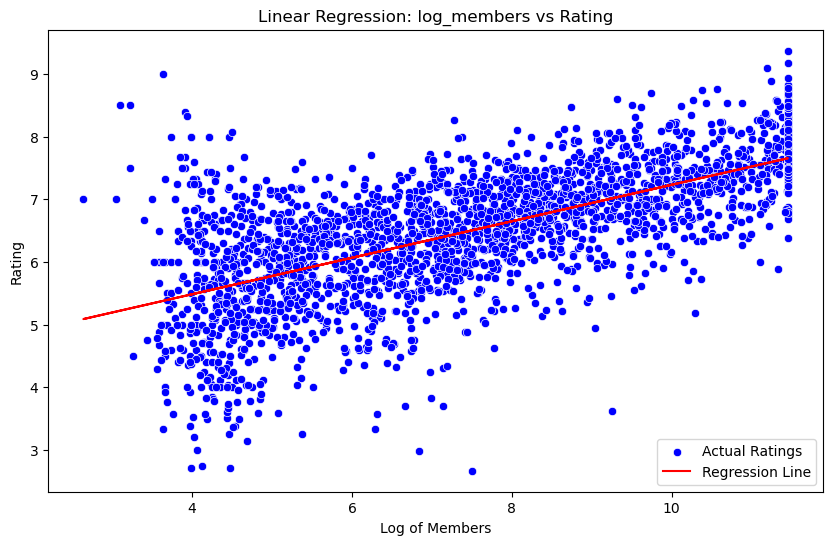

In [42]:
# Plot the scatter plot of log_members vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['log_members'], y=y_test, color='blue', label='Actual Ratings')

# Plot the regression line
plt.plot(X_test['log_members'], y_pred, color='red', label='Regression Line')

# Add labels and title
plt.title('Linear Regression: log_members vs Rating')
plt.xlabel('Log of Members')
plt.ylabel('Rating')
plt.legend()
plt.show()


## 6. Interpreting the Results:


# #4 Insights and Reporting


## 1. Impact of Feature Engineering:


## 2. Relationship Between Members and Rating:


## 3. Predictive Features:


# #5 Conclusion:

# #6 Next Steps and Improvements:


#                                                            Thank You